In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-mart-sales-prediction/Submission.csv
/kaggle/input/big-mart-sales-prediction/Train.csv
/kaggle/input/big-mart-sales-prediction/Test.csv


In [2]:
data=pd.read_csv("../input/big-mart-sales-prediction/Train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.shape

(8523, 12)

In [4]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
data.dtypes #here we can say that missing values in item_weight can be treated by using mean as the dtype of it is float64 where as for outlet_size we can go for mode as it has dtype as object

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)


In [8]:
data['Outlet_Size'].fillna('Medium',inplace=True)

In [9]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
data['Item_Fat_Content'].unique() #we need to fix the irregularity

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(to_replace=['low fat','LF'],value='Low Fat')
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(to_replace='reg',value='Regular')

In [12]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [13]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

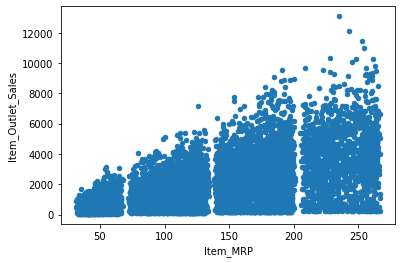

In [15]:
#scatterplot
data.plot(kind = "scatter", x='Item_MRP',y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

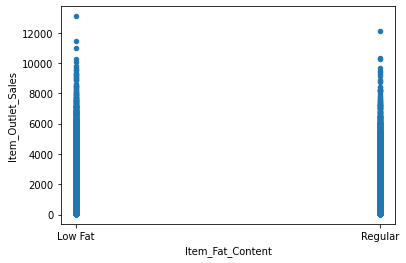

In [16]:
data.plot(kind="scatter",x='Item_Fat_Content',y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

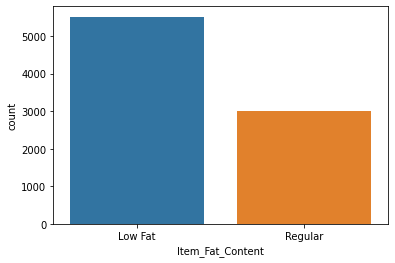

In [17]:
sns.countplot(x=data['Item_Fat_Content'])

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

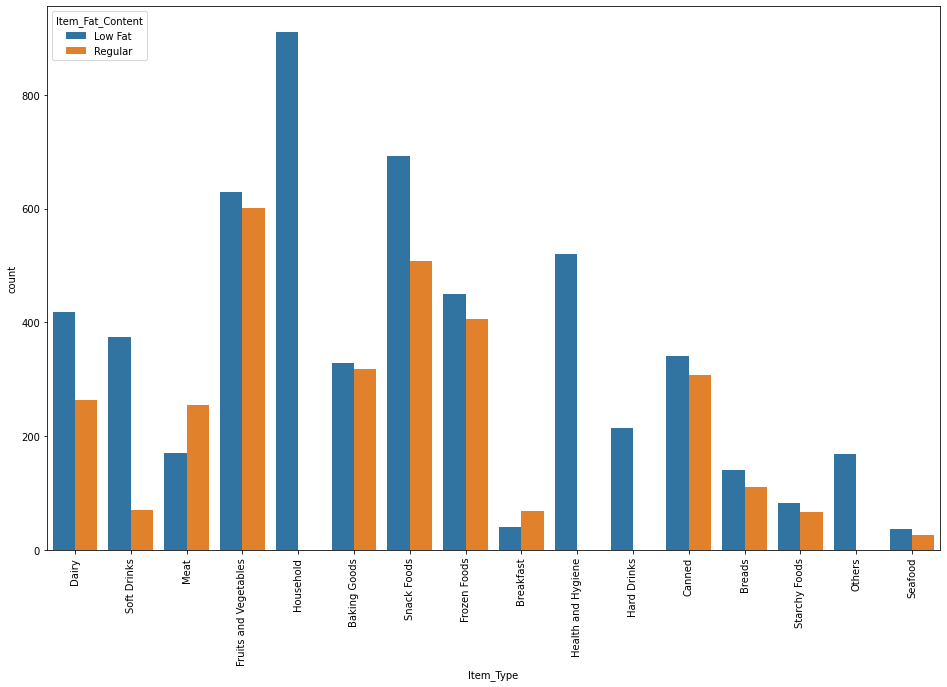

In [18]:
plt.figure(figsize=(16,10))
sns.countplot(x=data['Item_Type'],hue=data['Item_Fat_Content'])
plt.xticks(rotation=90)
data['Item_Type'].unique()

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

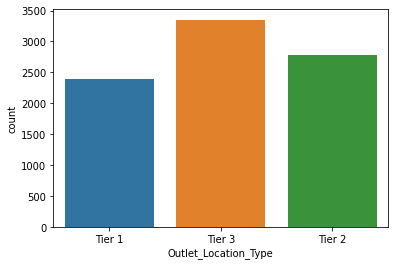

In [19]:
sns.countplot(x=data['Outlet_Location_Type'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

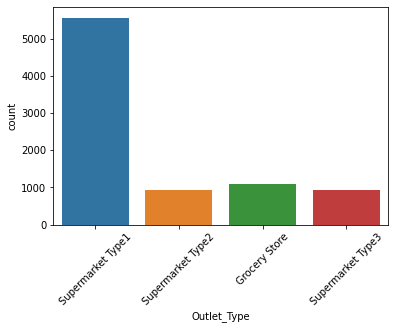

In [20]:
sns.countplot(data['Outlet_Type'])
plt.xticks(rotation=45)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

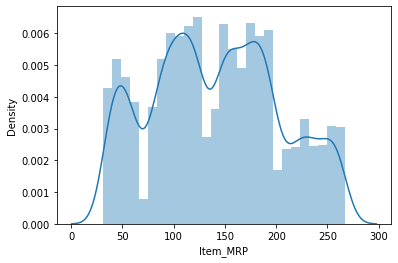

In [21]:
sns.distplot(data['Item_MRP'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

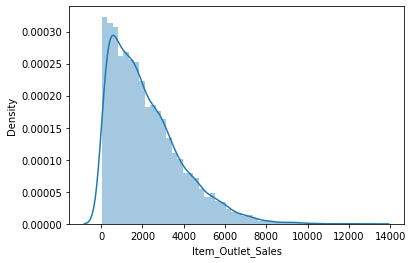

In [22]:
sns.distplot(data['Item_Outlet_Sales'])

<AxesSubplot:>

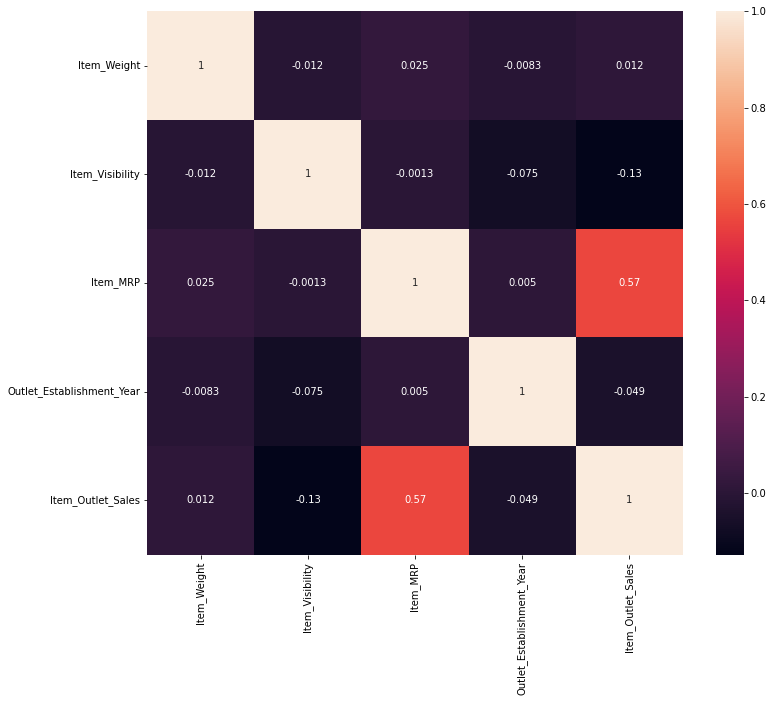

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

In [24]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
data['Outlet']=le.fit_transform(data['Outlet_Identifier'])

In [25]:
categorical_cols=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type', 'Outlet_Type']
for cols in categorical_cols:
    data[cols]=le.fit_transform(data[cols])

In [26]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,9
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,9
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800,0
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,1


In [27]:
#split dataset
X=data.drop(columns=['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier','Item_Outlet_Sales'])
y=data['Item_Outlet_Sales']

In [28]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [29]:
#train and test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)
print(x_train.shape,y_train.shape)

(6392, 9) (6392,)


In [30]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(x_test))

0.5114037590005387